In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [45]:
df = pd.read_csv("./formatted_results.csv")
df_noisy = pd.read_csv("./formatted_results_noisy.csv")
gma_enabled_on_dataset = df.loc[0]["GraphMatchingAttack"]
overlap_or_training_proportion = "Overlap" if gma_enabled_on_dataset else "Training Proportion"

In [46]:
df["Overlap"] = df["Overlap"].astype(float)
df["TrainedF1"] = df["TrainedF1"].astype(float)
df["ReidentificationRate"] = df["ReidentificationRate"].astype(float)

df_noisy["Overlap"] = df_noisy["Overlap"].astype(float)
df_noisy["TrainedF1"] = df_noisy["TrainedF1"].astype(float)
df_noisy["ReidentificationRate"] = df_noisy["ReidentificationRate"].astype(float)
baseline_metrics = {
    "fakename_1k":     {"Precision": 0.2162, "Recall": 0.2476, "Dice Coefficient": 0.2300},
    "fakename_2k":     {"Precision": 0.2131, "Recall": 0.2452, "Dice Coefficient": 0.2271},
    "fakename_5k":     {"Precision": 0.2144, "Recall": 0.2470, "Dice Coefficient": 0.2287},
    "fakename_10k":    {"Precision": 0.2151, "Recall": 0.2467, "Dice Coefficient": 0.2289},
    "fakename_20k":    {"Precision": 0.2153, "Recall": 0.2473, "Dice Coefficient": 0.2293},
    "fakename_50k":    {"Precision": 0.2151, "Recall": 0.2463, "Dice Coefficient": 0.2288},
    "titanic_full":    {"Precision": 0.2468, "Recall": 0.3770, "Dice Coefficient": 0.2896},
    "euro_person":     {"Precision": 0.2197, "Recall": 0.2446, "Dice Coefficient": 0.2306}
}

encoding_map = {
    "BloomFilter": "Bloom Filter",
    "TabMinHash": "Tabulation Minhash",
    "TwoStepHash": "Two-Step Hash"
}
dataset_map = {
    "fakename_1k.tsv": "FakeName (1k)",
    "fakename_2k.tsv": "FakeName (2k)",
    "fakename_5k.tsv": "FakeName (5k)",
    "fakename_10k.tsv": "FakeName (10k)",
    "fakename_20k.tsv": "FakeName (20k)",
    "fakename_50k.tsv": "FakeName (50k)",
    "titanic_full.tsv": "Titanic",
    "euro_person.tsv": "EuroPerson"
}

dataset_order = [
    "fakename_1k.tsv",
    "fakename_2k.tsv",
    "fakename_5k.tsv",
    "fakename_10k.tsv",
    "fakename_20k.tsv",
    "fakename_50k.tsv",
    "titanic_full.tsv",
    "euro_person.tsv"
]
dataset_order_index = {name: idx for idx, name in enumerate(dataset_order)}

def sort_datasets(sequence):
    """Return datasets in the canonical plotting order."""
    return sorted(sequence, key=lambda name: dataset_order_index.get(name, len(dataset_order_index)))



In [47]:
groupedByEncoding = (
    df.groupby(["Encoding", "Overlap"])
      [["TrainedPrecision", "TrainedRecall", "TrainedF1", "ReidentificationRate"]]
      .mean()
      .reset_index()
)
groupedByDataset = (
  df.groupby(["Dataset", "Overlap"])
    [["TrainedPrecision", "TrainedRecall", "TrainedF1", "ReidentificationRate"]]
    .mean()
    .reset_index()
)
groupedByEncodingAndDataset = (
    df.groupby(["Encoding", "Overlap", "Dataset"])
      [["TrainedPrecision", "TrainedRecall", "TrainedF1", "ReidentificationRate"]]
      .mean()
      .reset_index()
)

groupedByEncodingNoisy = (
    df_noisy.groupby(["Encoding", "Overlap"])
      [["TrainedPrecision", "TrainedRecall", "TrainedF1", "ReidentificationRate"]]
      .mean()
      .reset_index()
)
groupedByDatasetNoisy = (
  df_noisy.groupby(["Dataset", "Overlap"])
    [["TrainedPrecision", "TrainedRecall", "TrainedF1", "ReidentificationRate"]]
    .mean()
    .reset_index()
)
groupedByEncodingAndDatasetNoisy = (
    df_noisy.groupby(["Encoding", "Overlap", "Dataset"])
      [["TrainedPrecision", "TrainedRecall", "TrainedF1", "ReidentificationRate"]]
      .mean()
      .reset_index()
)

In [48]:
overall_avg_f1 = df_noisy["TrainedF1"].mean()
overall_avg_prr = df_noisy["ReidentificationRate"].mean()
print(f"Average F1:  {overall_avg_f1:.4f}")
print(f"Average PRR: {overall_avg_prr:.4f}")

best_f1_idx = df_noisy["TrainedF1"].idxmax()
best_reid_idx = df_noisy["ReidentificationRate"].idxmax()
best_f1_exp = df_noisy.loc[best_f1_idx]
best_reid_exp = df_noisy.loc[best_reid_idx]

print(f"Best F1: {best_f1_exp['TrainedF1']:.4f}")
print(f"Best PRR: {best_reid_exp['ReidentificationRate']:.4f}")

# === AVERAGES ===
avg_per_encoding = (
    df_noisy.groupby("Encoding")[["TrainedF1", "ReidentificationRate"]]
      .mean()
      .rename(columns={"TrainedF1": "AvgF1", "ReidentificationRate": "AvgPRR"})
      .reset_index()
)



print("\nAverage Per Encoding")
print(avg_per_encoding)



# === BEST PER ENCODING ===
best_per_encoding = (
    df_noisy.loc[df_noisy.groupby("Encoding")["TrainedF1"].idxmax(), 
           ["Encoding", "Dataset", "TrainedF1", "ReidentificationRate"]]
    .rename(columns={"TrainedF1": "F1", "ReidentificationRate": "PRRAtBestF1"})
    .reset_index(drop=True)
)
print("\nBest Per Encoding (by F1 Score)")
print(best_per_encoding)

best_per_encoding_reid = (
    df_noisy.loc[df_noisy.groupby("Encoding")["ReidentificationRate"].idxmax(),
           ["Encoding", "Dataset", "TrainedF1", "ReidentificationRate"]]
    .rename(columns={"ReidentificationRate": "PRR", "TrainedF1": "F1AtBestPRR"})
    .reset_index(drop=True)
)
print("\nBest Per Encoding (by PRR)")
print(best_per_encoding_reid)



Average F1:  0.6972
Average PRR: 0.0000
Best F1: 0.8156
Best PRR: 0.0003

Average Per Encoding
      Encoding     AvgF1    AvgPRR
0  BloomFilter  0.709412  0.000017
1   TabMinHash  0.671959  0.000008
2  TwoStepHash  0.710196  0.000025

Best Per Encoding (by F1 Score)
      Encoding           Dataset        F1  PRRAtBestF1
0  BloomFilter  fakename_50k.tsv  0.810766          0.0
1   TabMinHash  fakename_50k.tsv  0.802329          0.0
2  TwoStepHash  fakename_50k.tsv  0.815602          0.0

Best Per Encoding (by PRR)
      Encoding           Dataset  F1AtBestPRR     PRR
0  BloomFilter  fakename_10k.tsv     0.762467  0.0002
1   TabMinHash  fakename_20k.tsv     0.767140  0.0001
2  TwoStepHash  fakename_10k.tsv     0.784687  0.0003


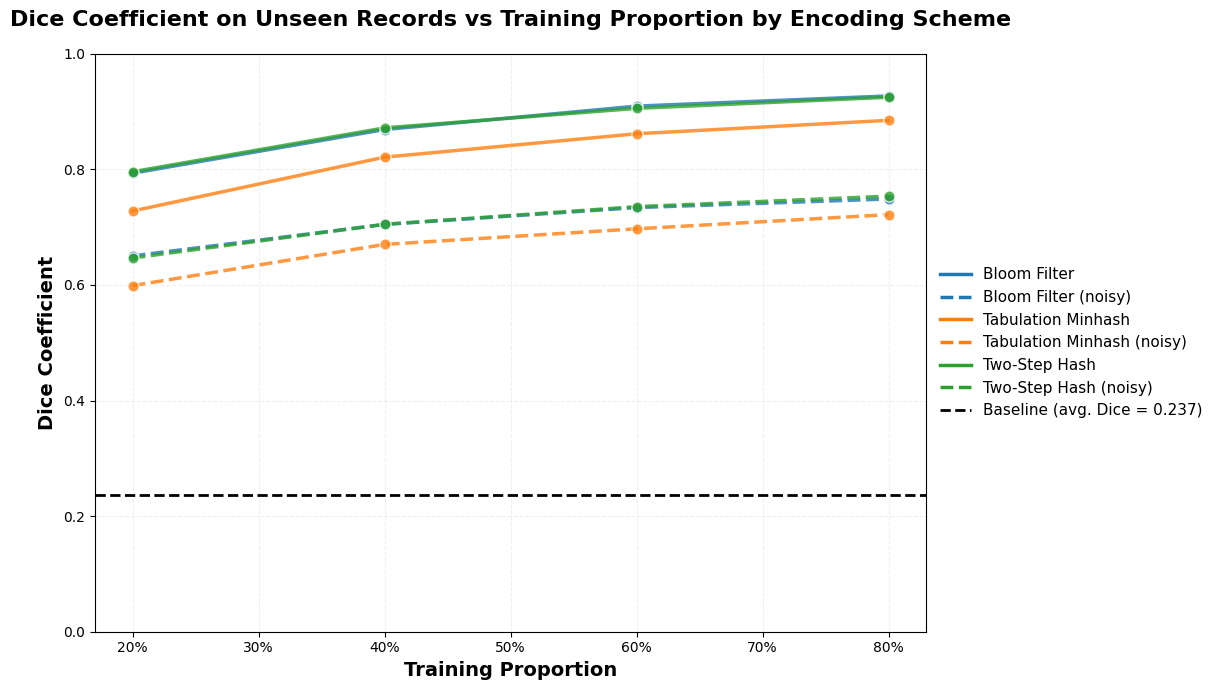

In [58]:
plt.figure(figsize=(12, 7))

encodings = groupedByEncoding['Encoding'].unique()
encodings.sort()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

for i, encoding in enumerate(encodings):
    # --- clean ---
    clean = groupedByEncoding[groupedByEncoding['Encoding'] == encoding].sort_values('Overlap')
    plt.plot(
        clean['Overlap'], clean['TrainedF1'],
        marker='o',
        color=colors[i],
        linewidth=2.5,
        markersize=8,
        markeredgecolor="white",
        label=f"{encoding_map.get(encoding, encoding)}",
        alpha=0.8
    )

    # --- noisy ---
    noisy = groupedByEncodingNoisy[groupedByEncodingNoisy['Encoding'] == encoding].sort_values('Overlap')
    plt.plot(
        noisy['Overlap'], noisy['TrainedF1'],
        marker='o',
        linestyle='--',              # dashed for noisy
        color=colors[i],             # same color
        linewidth=2.5,
        markersize=8,
        markeredgecolor="white",
        label=f"{encoding_map.get(encoding, encoding)} (noisy)",
        alpha=0.8
    )

# Baseline (same as your code)
baseline_f1s = [v['Dice Coefficient'] for v in baseline_metrics.values()]
avg_baseline_f1 = sum(baseline_f1s) / len(baseline_f1s)
plt.axhline(y=avg_baseline_f1, color='black', linestyle='--', linewidth=2,
            label=f'Baseline (avg. Dice = {avg_baseline_f1:.3f})')

plt.xlabel(overlap_or_training_proportion, fontsize=14, fontweight='bold')
ax = plt.gca()
ax.xaxis.set_major_formatter(PercentFormatter(1.0))
plt.ylabel('Dice Coefficient', fontsize=14, fontweight='bold')
plt.title(f"Dice Coefficient on Unseen Records vs {overlap_or_training_proportion} by Encoding Scheme",
          fontsize=16, fontweight='bold', pad=20)

from matplotlib.lines import Line2D

legend_handles = []

for i, encoding in enumerate(encodings):
    label = encoding_map.get(encoding, encoding)

    # clean proxy — no marker
    legend_handles.append(
        Line2D(
            [0], [0],
            color=colors[i],
            linestyle='-',
            linewidth=2.5,
            label=f"{label}"
        )
    )

    # noisy proxy — dashed, no marker
    legend_handles.append(
        Line2D(
            [0], [0],
            color=colors[i],
            linestyle='--',
            linewidth=2.5,
            label=f"{label} (noisy)"
        )
    )

# baseline proxy
legend_handles.append(
    Line2D(
        [0], [0],
        color='black',
        linestyle='--',
        linewidth=2,
        label=f'Baseline (avg. Dice = {avg_baseline_f1:.3f})'
    )
)

plt.legend(
    handles=legend_handles,
    fontsize=11,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=False
)

plt.grid(True, alpha=0.2, linestyle="--")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


Encoding: Bloom Filter
(0.2, 0.0028125)
(0.4, 0.004212499999999988)
(0.6, 0.0059375)
(0.8, 0.0062125)

Encoding: Tabulation Minhash
(0.2, 0.0018124999999999873)
(0.4, 0.003075)
(0.6, 0.0038374999999999998)
(0.8, 0.0043)

Encoding: Two-Step Hash
(0.2, 0.0030625)
(0.4, 0.004562500000000001)
(0.6, 0.005687499999999988)
(0.8, 0.005999999999999987)


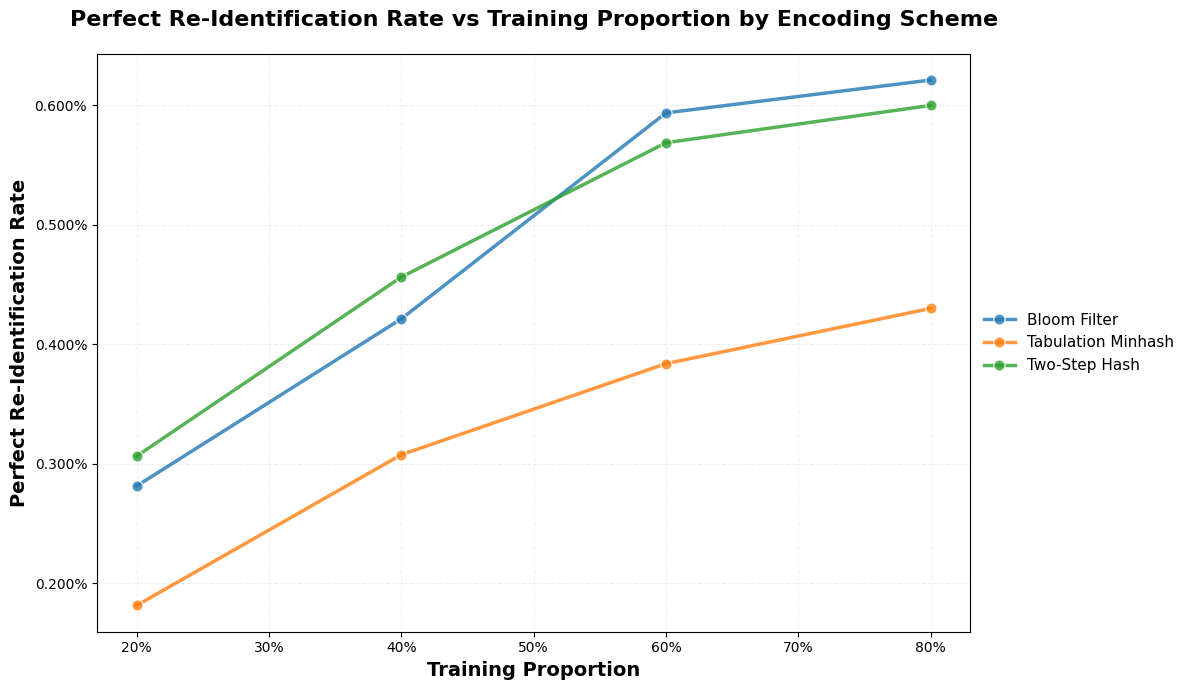

In [50]:
plt.figure(figsize=(12, 7))

# Get unique encoding schemes
encodings = groupedByEncoding['Encoding'].unique()

# Create a color palette for the different encoding schemes
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

for i, encoding in enumerate(encodings):
    # Filter data for this encoding
    encoding_data = groupedByEncoding[groupedByEncoding['Encoding'] == encoding]
    
    # Print (x, y) pairs
    print(f"\nEncoding: {encoding_map.get(encoding, encoding)}")
    for x, y in zip(encoding_data['Overlap'], encoding_data['ReidentificationRate']):
        print(f"({x}, {y})")
    
    # Plot the line
    plt.plot(encoding_data['Overlap'], encoding_data['ReidentificationRate'] * 100, 
             marker='o', 
             color=colors[i], 
             markeredgecolor="white",   # makes markers clearer
             linewidth=2.5, 
             markersize=8,
             label=encoding_map.get(encoding, encoding),
             alpha=0.8)

# Customize the plot
plt.xlabel(overlap_or_training_proportion, fontsize=14, fontweight='bold')
plt.ylabel('Perfect Re-Identification Rate', fontsize=14, fontweight='bold')
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter())
ax.xaxis.set_major_formatter(PercentFormatter(1.0))

plt.title(f"Perfect Re-Identification Rate vs {overlap_or_training_proportion} by Encoding Scheme", fontsize=16, fontweight='bold', pad=20)
# Legend outside the plot
plt.legend(fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Grid improvements
plt.grid(True, alpha=0.2, linestyle="--")

# Improve layout
plt.tight_layout()
plt.show()


Dataset: fakename_1k.tsv
(0.2, 0.46869984232393697)
(0.4, 0.6052204090694411)
(0.6, 0.6997415901295376)
(0.8, 0.7361775677141424)

Dataset: fakename_2k.tsv
(0.2, 0.6420109473258305)
(0.4, 0.7707449352279693)
(0.6, 0.8275204064939397)
(0.8, 0.8580706922011215)

Dataset: fakename_5k.tsv
(0.2, 0.7723435724546058)
(0.4, 0.871283456950554)
(0.6, 0.9120288578954909)
(0.8, 0.9307750596798261)

Dataset: fakename_10k.tsv
(0.2, 0.8686969992177387)
(0.4, 0.9335266928896173)
(0.6, 0.9524419568577347)
(0.8, 0.9662018048145673)

Dataset: fakename_20k.tsv
(0.2, 0.9327622334661082)
(0.4, 0.9668082007517107)
(0.6, 0.9747645901611849)
(0.8, 0.9796640914688105)

Dataset: fakename_50k.tsv
(0.2, 0.9700257416002892)
(0.4, 0.9834792150016796)
(0.6, 0.9875514121517318)
(0.8, 0.9896017314526352)

Dataset: titanic_full.tsv
(0.2, 0.5652135716280977)
(0.4, 0.7237413889237105)
(0.6, 0.8020065057473783)
(0.8, 0.8512372515445129)

Dataset: euro_person.tsv
(0.2, 0.959266523034016)
(0.4, 0.9767265634718209)
(0.6, 0.9

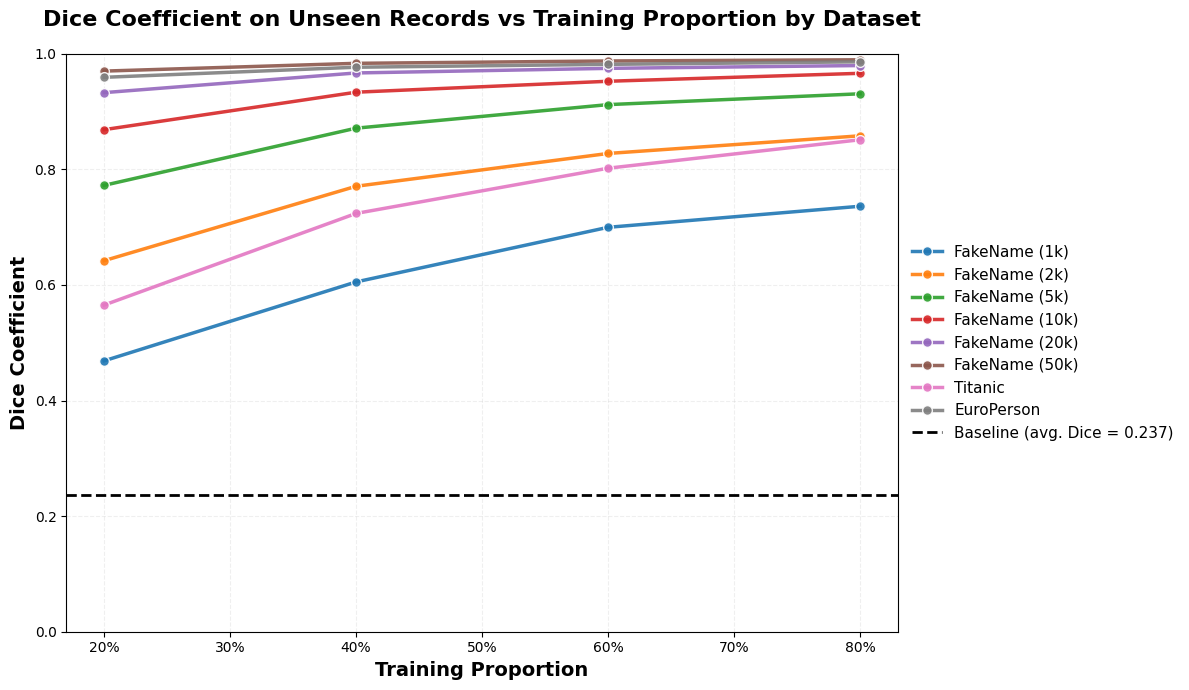

In [51]:
plt.figure(figsize=(12, 7))

datasets = groupedByDataset['Dataset'].unique()

colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
    "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"
]

datasets = sort_datasets(datasets)

for i, dataset in enumerate(datasets):
    dataset_data = groupedByDataset[groupedByDataset['Dataset'] == dataset]
    
     # Print (x, y) pairs
    print(f"\nDataset: {dataset}")
    for x, y in zip(dataset_data['Overlap'], dataset_data['TrainedF1']):
        print(f"({x}, {y})")
    plt.plot(dataset_data['Overlap'], dataset_data['TrainedF1'], 
             marker='o', 
             markersize=7,
             markeredgecolor="white",   # makes markers clearer
             linewidth=2.5, 
             color=colors[i % len(colors)],
             label=dataset_map.get(dataset, dataset),
             alpha=0.9)

# Labels & title
plt.xlabel(overlap_or_training_proportion, fontsize=14, fontweight='bold')
plt.ylabel('Dice Coefficient', fontsize=14, fontweight='bold')

plt.title(f"Dice Coefficient on Unseen Records vs {overlap_or_training_proportion} by Dataset", fontsize=16, fontweight='bold', pad=20)

baseline_f1s = [v['Dice Coefficient'] for v in baseline_metrics.values()]
avg_baseline_f1 = sum(baseline_f1s) / len(baseline_f1s)
plt.axhline(y=avg_baseline_f1, color='black', linestyle='--', linewidth=2, label=f'Baseline (avg. Dice = {avg_baseline_f1:.3f})')

# Legend outside the plot
plt.legend(fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax = plt.gca()
ax.xaxis.set_major_formatter(PercentFormatter(1.0))
# Grid improvements
plt.grid(True, alpha=0.2, linestyle="--")

plt.ylim(0,1)

plt.tight_layout()
plt.show()

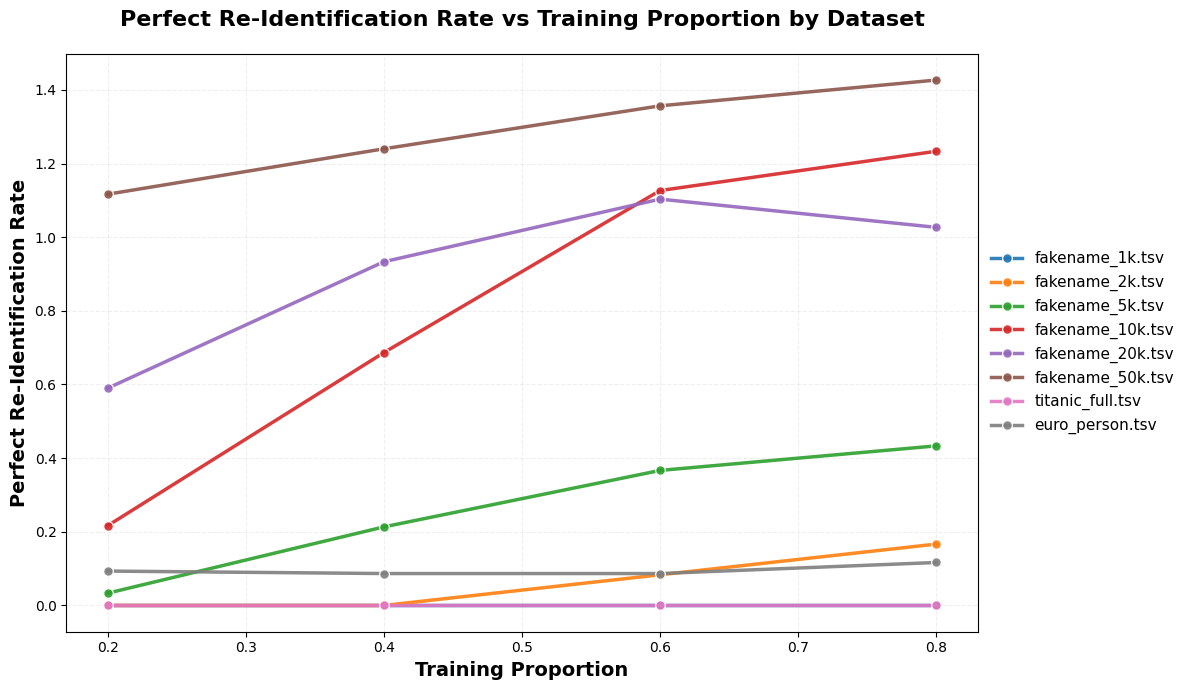

In [52]:
plt.figure(figsize=(12, 7))

datasets = groupedByDataset['Dataset'].unique()

datasets = sort_datasets(datasets)

colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
    "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"
]

for i, dataset in enumerate(datasets):
    dataset_data = groupedByDataset[groupedByDataset['Dataset'] == dataset]
    
    plt.plot(dataset_data['Overlap'], dataset_data['ReidentificationRate'] * 100, 
             marker='o', 
             markersize=7,
             markeredgecolor="white",   # makes markers clearer
             linewidth=2.5, 
             color=colors[i % len(colors)],
             label=dataset,
             alpha=0.9)

# Labels & title
plt.xlabel(overlap_or_training_proportion, fontsize=14, fontweight='bold')
plt.ylabel('Perfect Re-Identification Rate', fontsize=14, fontweight='bold')

plt.title(f"Perfect Re-Identification Rate vs {overlap_or_training_proportion} by Dataset", fontsize=16, fontweight='bold', pad=20)

# Legend outside the plot
plt.legend(fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Grid improvements
plt.grid(True, alpha=0.2, linestyle="--")

plt.tight_layout()
plt.show()

Encoding: BloomFilter


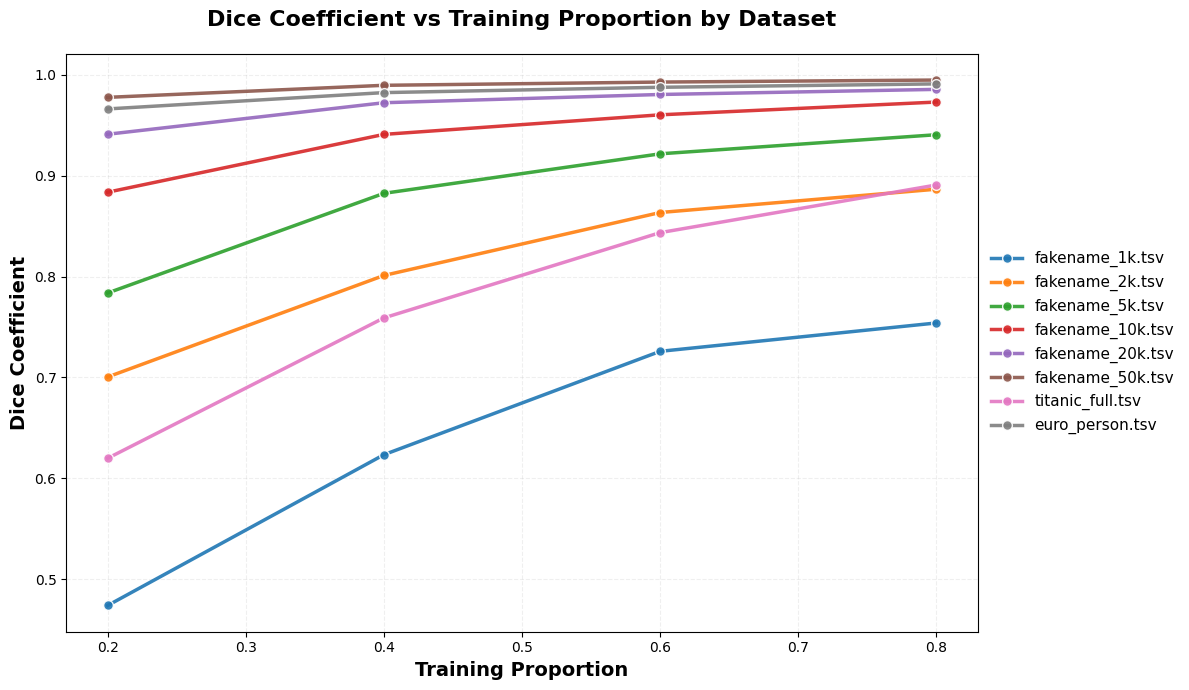

Encoding: TabMinHash


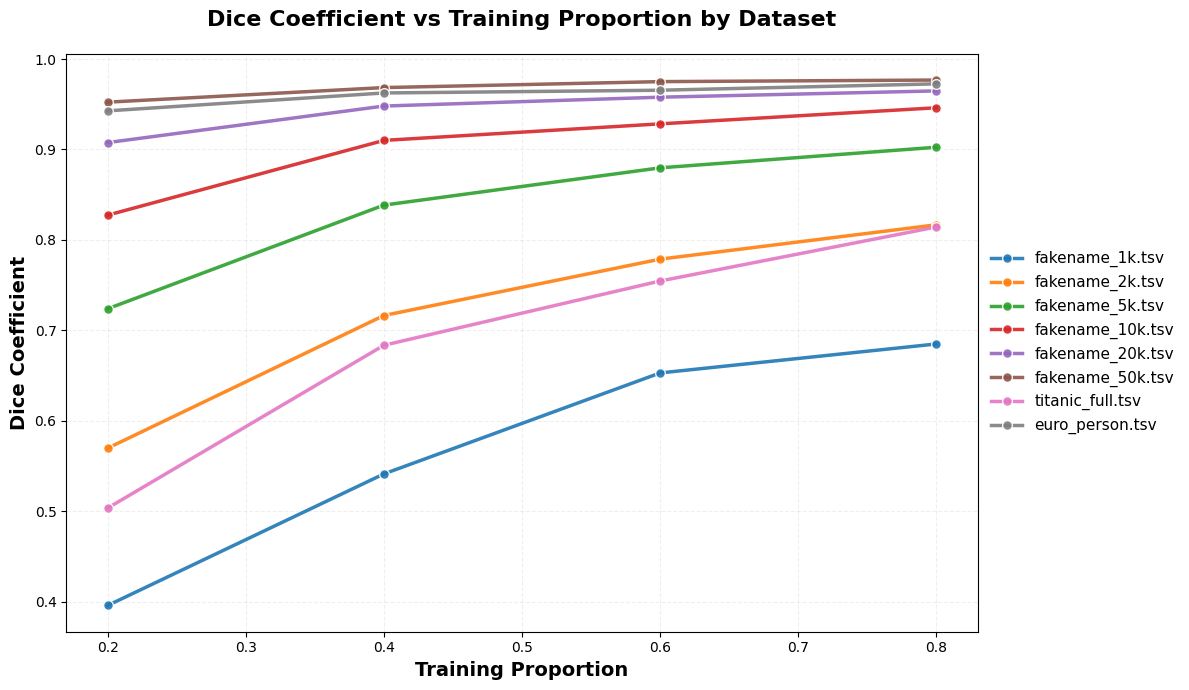

Encoding: TwoStepHash


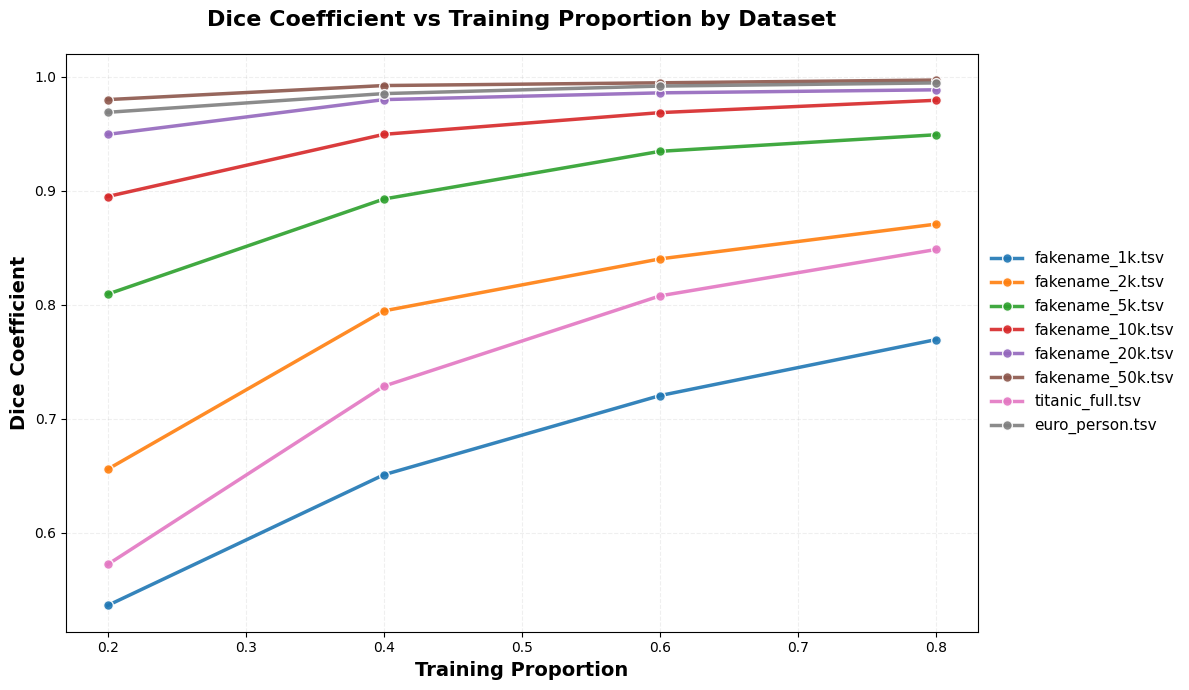

In [53]:
# Get unique encoding schemes
encodings = groupedByEncodingAndDataset['Encoding'].unique()

encodings.sort()

for i, encoding in enumerate(encodings):
    plt.figure(figsize=(12, 7))
    print("Encoding: " + encoding)
    encoding_data = groupedByEncodingAndDataset[groupedByEncodingAndDataset['Encoding'] == encoding]
    datasets = encoding_data['Dataset'].unique()
    
    datasets = sort_datasets(datasets)

    colors = [
        "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
        "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"
    ]

    for i, dataset in enumerate(datasets):
        dataset_data = encoding_data[encoding_data['Dataset'] == dataset]
        
        plt.plot(dataset_data['Overlap'], dataset_data['TrainedF1'], 
                marker='o', 
                markersize=7,
                markeredgecolor="white",   # makes markers clearer
                linewidth=2.5, 
                color=colors[i % len(colors)],
                label=dataset,
                alpha=0.9)

    # Labels & title
    plt.xlabel(overlap_or_training_proportion, fontsize=14, fontweight='bold')
    plt.ylabel('Dice Coefficient', fontsize=14, fontweight='bold')

    plt.title(f"Dice Coefficient vs {overlap_or_training_proportion} by Dataset", fontsize=16, fontweight='bold', pad=20)

    # Legend outside the plot
    plt.legend(fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

    # Grid improvements
    plt.grid(True, alpha=0.2, linestyle="--")

    plt.tight_layout()
    plt.show()

Encoding: BloomFilter


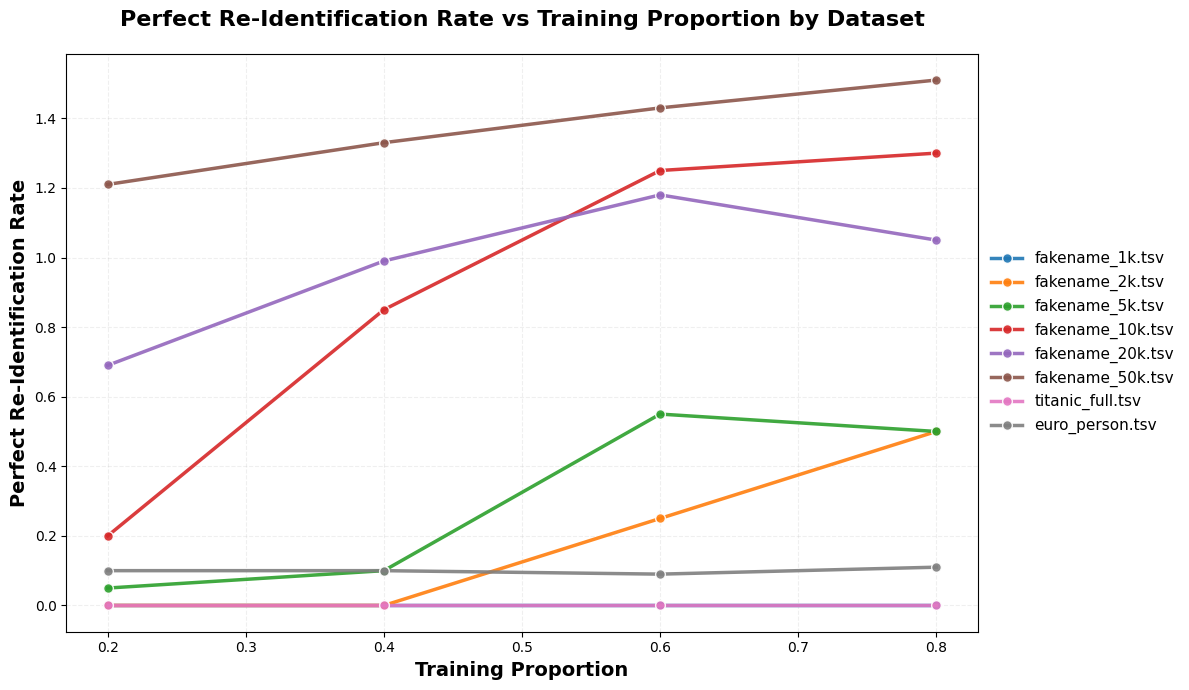

Encoding: TabMinHash


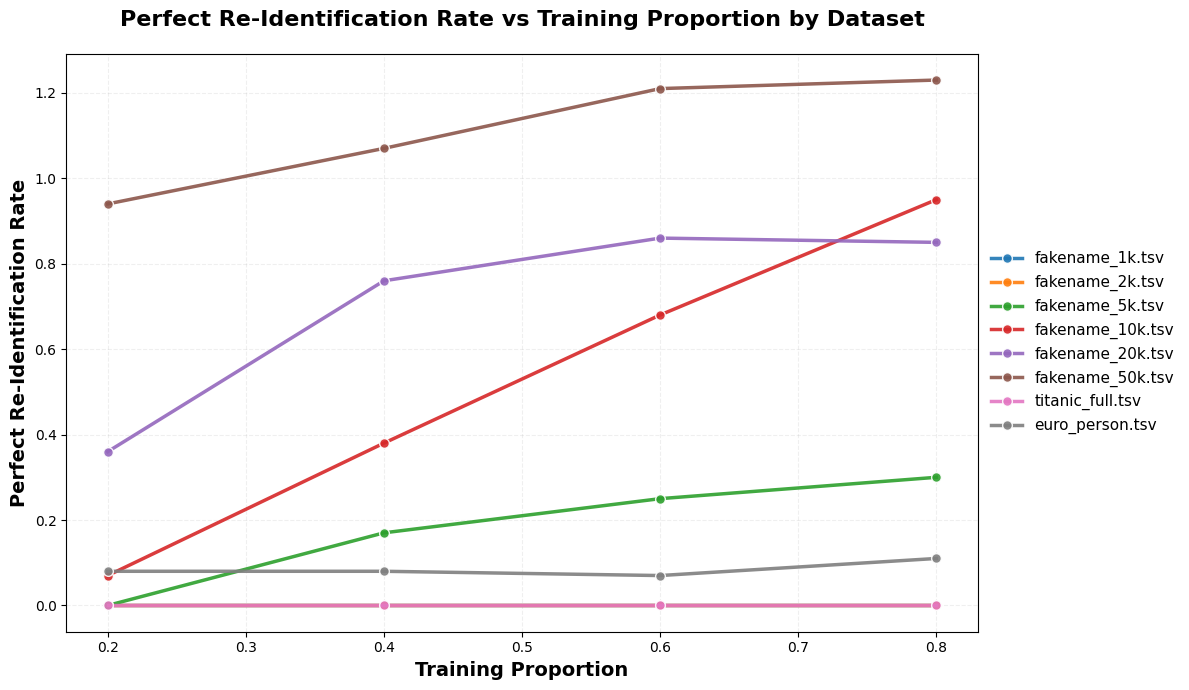

Encoding: TwoStepHash


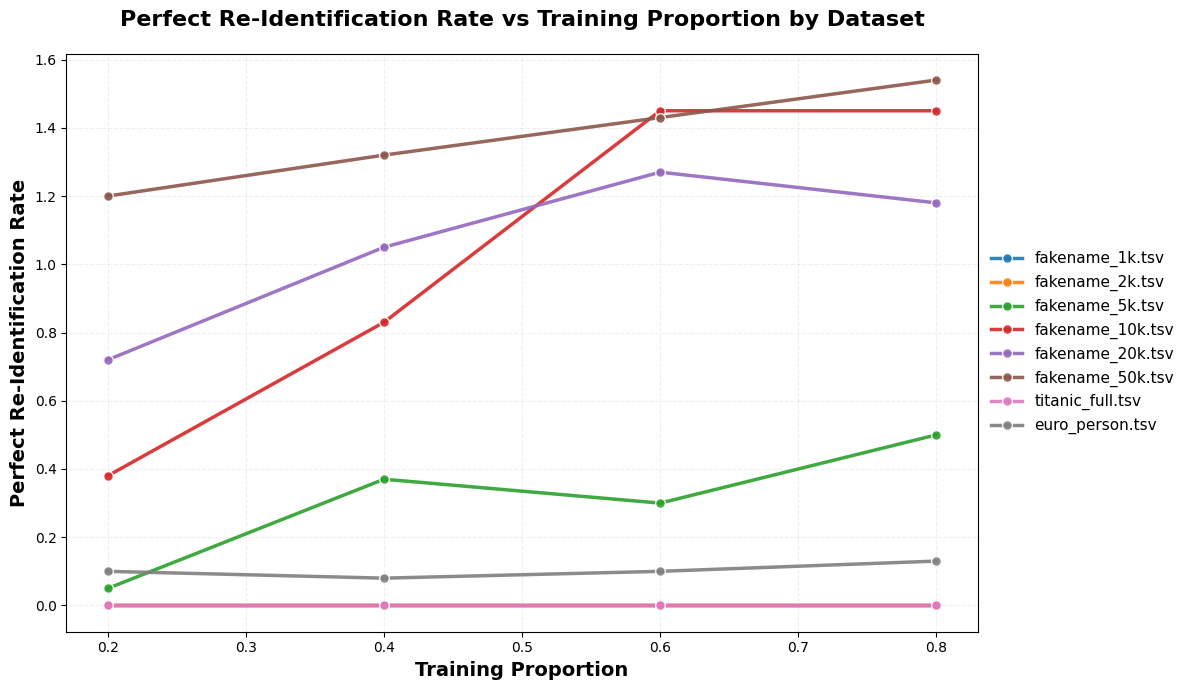

In [54]:
# Get unique encoding schemes
encodings = groupedByEncodingAndDataset['Encoding'].unique()

encodings.sort()

for i, encoding in enumerate(encodings):
    plt.figure(figsize=(12, 7))
    print("Encoding: " + encoding)
    encoding_data = groupedByEncodingAndDataset[groupedByEncodingAndDataset['Encoding'] == encoding]
    datasets = encoding_data['Dataset'].unique()
    
    datasets = sort_datasets(datasets)

    colors = [
        "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
        "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"
    ]

    for i, dataset in enumerate(datasets):
        dataset_data = encoding_data[encoding_data['Dataset'] == dataset]
        
        plt.plot(dataset_data['Overlap'], dataset_data['ReidentificationRate'] * 100, 
                marker='o', 
                markersize=7,
                markeredgecolor="white",   # makes markers clearer
                linewidth=2.5, 
                color=colors[i % len(colors)],
                label=dataset,
                alpha=0.9)

    # Labels & title
    plt.xlabel(overlap_or_training_proportion, fontsize=14, fontweight='bold')
    plt.ylabel('Perfect Re-Identification Rate', fontsize=14, fontweight='bold')
    plt.title(f"Perfect Re-Identification Rate vs {overlap_or_training_proportion} by Dataset", fontsize=16, fontweight='bold', pad=20)

    # Legend outside the plot
    plt.legend(fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

    # Grid improvements
    plt.grid(True, alpha=0.2, linestyle="--")

    plt.tight_layout()
    plt.show()